> 使用PyTorch入门：训练一个全连接神经网络模型，使用MNIST数据集进行测试

> 2022.04.28 kidzying

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn

In [7]:
df = pd.read_csv('./mnist_data/mnist_train.csv',header=None)

In [8]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
len(df)

60000

### 数据集处理

In [5]:
from torch.utils.data import Dataset

In [19]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        """
        计算dataframe的行数
        """
        return len(self.data_df)
    
    def __getitem__(self, index):
        """
        获取某个图像记录：标记、x张量、y张量
        """
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 图像数据，原取值范围为0-255，标准化为0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # 返回
        return label, image_values, target
    
    def plot_image(self, index):
        """
        打印图片
        """
        image_data = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(image_data, interpolation = 'none', cmap = 'Greens')
        pass

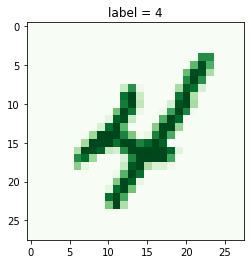

In [20]:
# 载入数据
mnist_dataset = MnistDataset('./mnist_data/mnist_train.csv')
mnist_dataset.plot_image(9)

In [22]:
# 测试数据访问
mnist_dataset[10]

(3,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

### 神经网络分类器定义

In [74]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # 定义神经网络层
        self.model = nn.Sequential(
            nn.Linear(784,200),
            #nn.Sigmoid(),
            nn.LeakyReLU(0.02),
            nn.Linear(200,10),
            #nn.Sigmoid()
            nn.LeakyReLU(0.02)
        )
        
        # 记录训练进展的计数器和列表
        self.counter = 0 
        self.progress = []
        
        # 创建损失函数
        self.loss_function = nn.MSELoss()
        
        # 创建优化器
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)  # 注意这里学习率的设置对结果的影响很大
    
    def forward(self, inputs):
        """
        该方法用于向网络传递信息
        """
        
        # 直接运行模型
        return self.model(inputs)
       
    def train(self, inputs, targets):
        """
        模型训练
        """
        
        # 计算网络的输出值
        outputs = self.forward(inputs)
        
        # 计算损失值
        loss = self.loss_function(outputs, targets)
        
        # 统计训练的样本数量
        self.counter += 1
        # 每10个训练样本后更新进度
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        # 每1万个训练样本后打印计数器的值
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        
        # 梯度归0，反向传播
        self.optimiser.zero_grad()
        loss.backward()
        # 使用梯度逐步（step)更新网络的可学习参数
        self.optimiser.step()
       
    def plot_process(self):
        """
        绘制损失值
        """
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
        pass

### 训练网络

In [75]:
%%time

# 创建神经网络
C = Classifier()

# 在mnist数据集上训练数据，训练3次
epochs = 6
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor,target_tensor)
        pass
    pass

training epoch 1 of 6
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 6
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 6
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 6
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
training epoch 5 of 6
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
training epoch 6 of 6
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
CPU times: user 4min 48s, sys: 10.2 s, total: 4min 58s
Wall time: 3min 31s


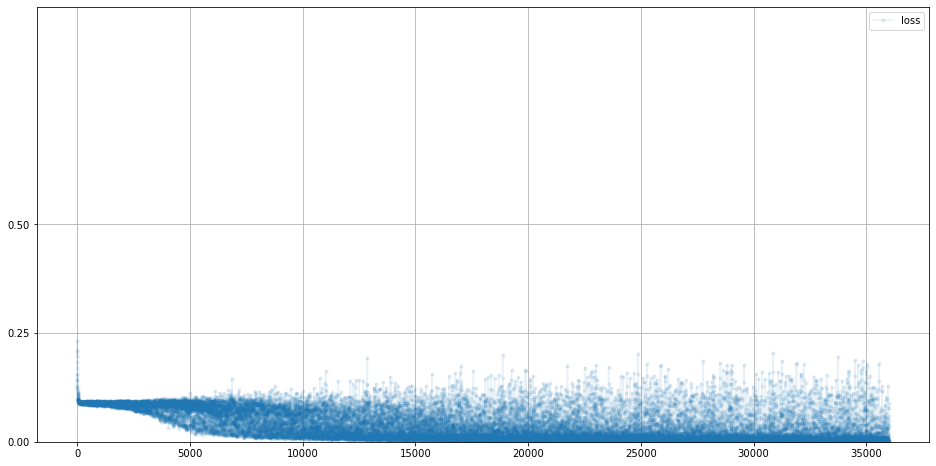

In [67]:
# 绘制分类器损失值
C.plot_process()

### 测试模型

#### 单个值测试

In [68]:
# 加载测试数据
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')

In [69]:
# 挑选一幅图进行测试
record = 43

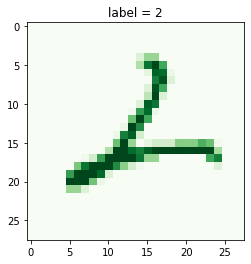

In [70]:
mnist_test_dataset.plot_image(record)

使用模型进行预测

<AxesSubplot:>

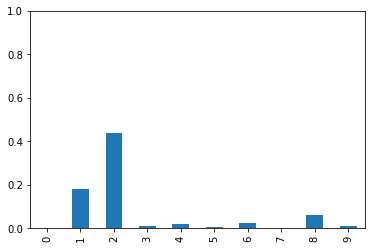

In [71]:
image_data = mnist_test_dataset[record][1]
# 调用训练后的神经网络
output = C.forward(image_data)
# 绘制输出张量
pd.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))

#### 整体效果测试

In [72]:
score = 0
items = 0

In [73]:
for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if(answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

# 打印正确率
print(score, items, score/items)

8951 10000 0.8951
